## Part 6. Pandas

Pandas is another useful package - a key one for data science. So far Python data structures we considered, while useful, might feel a bit absract. There is still a way to go between a data source (e.g. csv file) and abstract constructions such as lists, dictionaries or numpy arrays and it might not be that clear how to get the least from the first.

Pandas bridges that gap literally in one click.

It implements data tables (dataframes) which can be directly uploaded into the notebook from a csv or other data file. Pandas dataframes can contain multiple columns with data of arbitrary type - numerical, string or date-time. They also provide common relational database functionality. 

In short, Pandas dataframes enable real-world data analytics.

Below read weather data for NYC. Max, Min and Average daily temperature as well as precipitation are measured for several locations accross the city, defined by their latitute-longituide

In [1]:
#import pandas
import pandas as pd

In [2]:
#read DataFrame from csv file
WD=pd.read_csv('data/weather_daily.csv');

In [3]:
#the entire dataframe is too big too see, but a glimpse into it could be made by the method head()
WD.head()

,date,maxtemp,mintemp,avgtemp,precipitation,snowfall,latitude,longitude
0,1/1/11 0:00,51,38,44.5,0,0,40.84,-73.85
1,1/2/11 0:00,52,38,45,0.01,0,40.84,-73.85
2,1/3/11 0:00,38,29,33.5,0,0,40.84,-73.85
3,1/4/11 0:00,42,32,37,0,0,40.84,-73.85
4,1/5/11 0:00,40,32,36,0,0,40.84,-73.85


In [4]:
#we can also look at the statistics, but unfortunately only two columns are numeric. The rest were read as strings due to missing/wrong data
WD.describe()

,latitude,longitude
count,4774.000000,4774.000000
mean,40.758513,-73.875316
std,0.068739,0.069974
min,40.650000,-73.970000
25%,40.650000,-73.970000
50%,40.770000,-73.900000
75%,40.780000,-73.780000
max,40.840000,-73.780000


Our Pandas DataFrame appears to be composed of several data `Series`: date, maxtemp, mintemp, avgtemp,snowfall,latitude,longitude

In [5]:
#the can be accessed by calling their name after '.'
WD.date;

In [6]:
#or in square braces
WD['date'];

Series work similarly to arrays and can be indexed or sliced. The main difference is that in addition to the
regular indexing by ingeter non-negative order numbers, the indexing could be also done through a custom index supplied in the DataFrame (left column) which is inherited by all the Series. This way Series work similarly to dictionaries. In the case above however both indeces are the same

In [7]:
#in the case above the provided index (first column) is the same as index by order, so both types of indexing are the same
WD.date[0] #but in general square braces use custom DataFrame Index
WD.date.iloc[0] #and iloc uses integer indexing by order

'1/1/11 0:00'

Due to some missing/incorrect data most of the columns are read as string, rather than numeric or datetime. The statements below convert them to the right data type, coercing wrong value to NaN's.

In [8]:
WD.avgtemp=pd.to_numeric(WD.avgtemp, errors='coerce')

In [9]:
WD.maxtemp=pd.to_numeric(WD.maxtemp, errors='coerce')

In [10]:
WD.mintemp=pd.to_numeric(WD.mintemp, errors='coerce')

In [11]:
WD.precipitation=pd.to_numeric(WD.precipitation, errors='coerce')

In [12]:
WD.snowfall=pd.to_numeric(WD.snowfall, errors='coerce')

In [13]:
WD.date=pd.to_datetime(WD.date, errors='coerce')

In [14]:
#finally - drop the rows with NaN's
WD=WD.dropna()

This is perhaps one of the most streightforward and universal ways of data clearning in Pandas. Or course it is a bit risky to do it blindly as many data, which otherwise could make sense, can be lost this way. Luckily, this is not our case here.

In [15]:
#now once all the columns have correct data types we can look at the statistics for all the columns
WD.describe()

,maxtemp,mintemp,avgtemp,precipitation,snowfall,latitude,longitude
count,4373.000000,4373.000000,4373.000000,4373.00000,4373.000000,4373.000000,4373.000000
mean,61.583810,47.723988,54.653899,0.13456,0.096570,40.751098,-73.877626
std,17.969404,16.767256,17.194507,0.41301,0.689015,0.067042,0.072646
min,17.000000,3.000000,11.000000,0.00000,0.000000,40.650000,-73.970000
25%,47.000000,35.000000,41.000000,0.00000,0.000000,40.650000,-73.970000
50%,62.000000,47.000000,54.000000,0.00000,0.000000,40.770000,-73.900000
75%,77.000000,63.000000,70.000000,0.05000,0.000000,40.780000,-73.780000
max,104.000000,86.000000,94.500000,7.80000,12.300000,40.840000,-73.780000


In [16]:
#while we have 4373 observations we have only 4 locations
Locations=pd.unique(WD[['latitude','longitude']].values); Locations

array([(40.840000000000003, -73.849999999999994),
       (40.780000000000001, -73.969999999999999),
       (40.649999999999999, -73.780000000000001),
       (40.770000000000003, -73.900000000000006)], dtype=object)

In [17]:
#let us plot the average temperature against time
#statement below is used to make iPython position the plots within the notebook
%matplotlib inline 

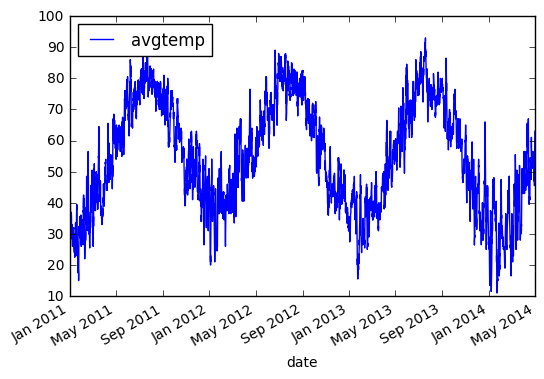

In [18]:
#pandas has its own plot function, still based on matplotlib however
#one of the uses - let it plot one column (Series) against the other. In our case - avgtemp against date
WD.plot(x='date',y='avgtemp')

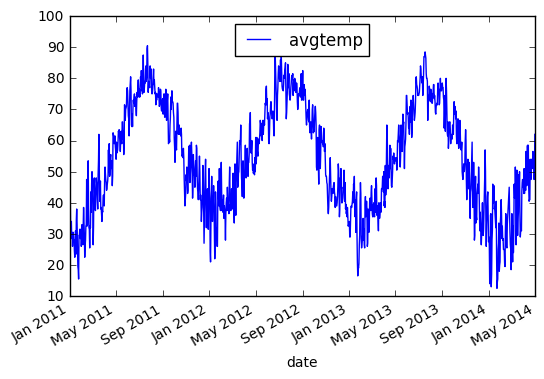

In [19]:
#now filter the observations for third location only and redo the plot
WD[WD.latitude==Locations[2][0]].plot(x='date',y='avgtemp')

While this case does not provide a comprehensive overview of Pandas, it gives an idea of what it could be used for and how to upload, clean, filter, analyze and visualize the data. Please keep in mind however that all those operations have multiple possible implementations in Pandas, we just demonstrated one of the approaches. A more comprehensive exploration of the package is strongly recommended